# Exercise: Derivatives

- by Börge Göbel

In [38]:
import numpy as np
import matplotlib.pyplot as plt 

### Load data

In [39]:
data = np.loadtxt("04b_Exercise_velocity_acceleration_data_file.dat")

In [40]:
data

array([[  0.        ,   1.        ],
       [  0.1       ,   1.01980001],
       [  0.2       ,   1.03920011],
       ...,
       [ 99.8       ,  15.25565932],
       [ 99.9       ,  15.33160759],
       [100.        ,  15.40808206]])

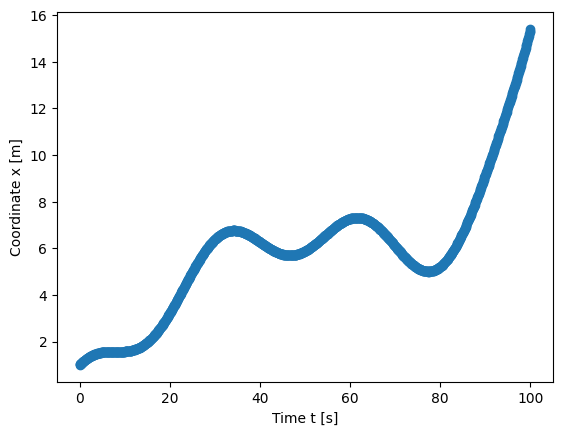

In [41]:
plt.xlabel('Time t [s]')
plt.ylabel('Coordinate x [m]')
plt.scatter(data[:,0],data[:,1])

### Task

Calculate the velocity $v(t)=\dot{x}(t)$ and the acceleration $a(t)=\ddot{x}(t)$ for the loaded data set that describes a set of points $(t_i,x_i)$ for $i=0,\dots,1000$.

1. Calculate $v_i$ and $a_i$ using the forward-differences, central-differences and Richardson methods
2. Determine the maximum value of the acceleration and the corresponding time.

Be careful, now we do not know the function $x(t)$ but only its values for specific points. You have to define the functions for the derivativesa bit differently.

### Solution

In [42]:
data[2:,1]

array([ 1.03920011,  1.05820053,  1.07680168,  1.0950041 ,  1.11280851,
        1.13021576,  1.14722688,  1.16384304,  1.18006559,  1.195896  ,
        1.21133592,  1.22638716,  1.24105165,  1.2553315 ,  1.26922896,
        1.28274645,  1.29588651,  1.30865184,  1.3210453 ,  1.33306988,
        1.34472873,  1.35602512,  1.3669625 ,  1.37754443,  1.38777461,
        1.3976569 ,  1.40719528,  1.41639387,  1.42525692,  1.43378882,
        1.44199409,  1.44987736,  1.4574434 ,  1.46469711,  1.47164351,
        1.47828773,  1.48463502,  1.49069077,  1.49646044,  1.50194964,
        1.50716407,  1.51210955,  1.516792  ,  1.52121744,  1.52539198,
        1.52932184,  1.53301335,  1.5364729 ,  1.53970699,  1.54272221,
        1.54552522,  1.54812276,  1.55052168,  1.55272887,  1.55475132,
        1.55659606,  1.55827023,  1.55978101,  1.56113563,  1.5623414 ,
        1.56340568,  1.56433589,  1.56513949,  1.56582399,  1.56639695,
        1.56686596,  1.56723865,  1.5675227 ,  1.56772581,  1.56

$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}$

$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x)-f(x-h)}{h}$

$ f'(x)=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}$

Forward differences
$ f'(x_n)\approx\frac{f(x_{n+1})-f(x_n)}{x_{n+1}-x_n}$

Backward differences
$ f'(x)\approx\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}$

Central differences
$ f'(x)\approx\frac{f(x_{n+1})-f(x_{n-1})}{x_{n+1}-x_{n-1}}$

In [43]:
def forward(data):
    derive = np.zeros(len(data[:,1]))
    # for equidistant data
    # h = (data[1,0]-data[0,0])
    # velocity[:-1] = data[1:,1]-data[:-1,1] / h
    # general
    derive[:-1] = (data[1:,1]-data[:-1,1]) / (data[1:,0]-data[:-1,0])
    # last value use backwards methode (or just set to second-last value)
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0],derive])

In [44]:
velocityForward = forward(data)
accelerationForward = forward(forward(data))

In [45]:
def central(data):
    derive = np.zeros(len(data[:,1]))
    derive[0] = (data[1,1]-data[0,1]) / (data[1,0]-data[0,0])
    derive[1:-1] = (data[2:,1]-data[:-2,1]) / (data[2:,0] - data[:-2,0])
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    return np.transpose([data[:,0], derive])

In [46]:
velocityCentral = central(data)
accelerationCentral = central(central(data))

Richardson: $f'(x)=\frac{1}{12h}\left[f(x-2h)-8f(x-h)+8f(x+h)-f(x+2h)\right]+\mathcal{O}(h^4)$

In [55]:
def Richardson(data):
    derive = np.zeros(len(data[:,1]))
    # derive[2:-2] = (-data[4:,1]+8*data[3:-1,1]-8*data[1:-3,1]+data[:-4,1]) / (12*(data[3:-1,0]-data[2:-2,0]))
    derive[2:-2] = 1/(12*(data[3:-1,0]-data[2:-2,0])) * (data[:-4,1]-8*data[1:-3,1]+8*data[3:-1,1]-data[4:,1])
    # first values
    derive[0] = (data[1,1]-data[0,1]) / (data[1,0]-data[0,0])
    derive[1] = (data[2,1]-data[0,1]) / (data[2,0]-data[0,0])
    # last values
    derive[-1] = (data[-1,1]-data[-2,1]) / (data[-1,0]-data[-2,0])
    derive[-2] = (data[-1,1]-data[-3,1]) / (data[-1,0]-data[-3,0])
    return np.transpose([data[:,0], derive])

In [51]:
velocityRichardson = Richardson(data)
accelerationRichardson = Richardson(Richardson(data))

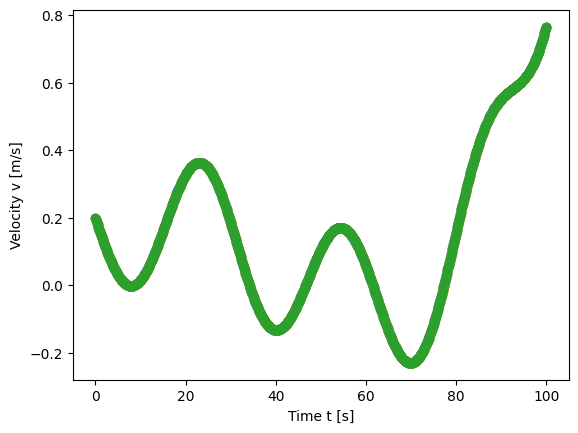

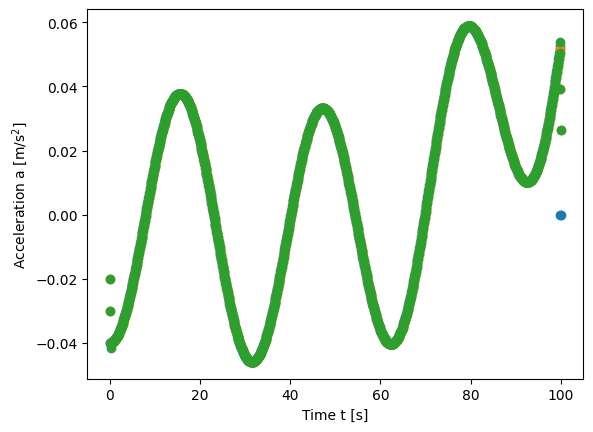

In [58]:
plt.xlabel("Time t [s]")
plt.ylabel("Velocity v [m/s]")
plt.scatter(velocityForward[:,0], velocityForward[:,1])
plt.scatter(velocityCentral[:,0], velocityCentral[:,1])
plt.scatter(velocityRichardson[:,0], velocityRichardson[:,1])
plt.show()

plt.xlabel("Time t [s]")
plt.ylabel("Acceleration a [m/s$^2$]")
plt.scatter(accelerationForward[:,0], accelerationForward[:,1])
plt.scatter(accelerationCentral[:,0], accelerationCentral[:,1])
plt.scatter(accelerationRichardson[:,0], accelerationRichardson[:,1])
plt.show()

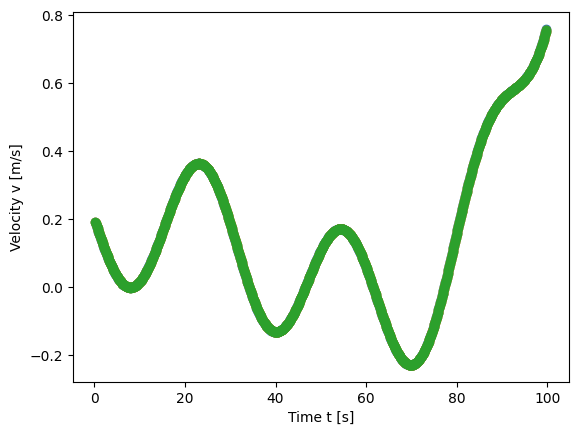

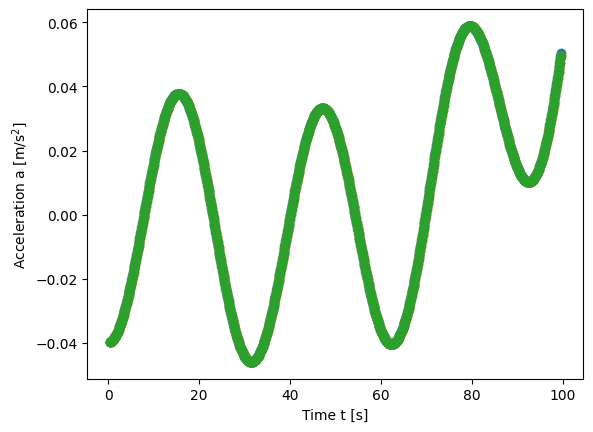

In [67]:
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.scatter(velocityForward[2:-2,0],velocityForward[2:-2,1])
plt.scatter(velocityCentral[2:-2,0],velocityCentral[2:-2,1])
plt.scatter(velocityRichardson[2:-2,0],velocityRichardson[2:-2,1])
plt.show()

plt.xlabel('Time t [s]')
plt.ylabel('Acceleration a [m/s$^2$]')
plt.scatter(accelerationForward[4:-4,0],accelerationForward[4:-4,1])
plt.scatter(accelerationCentral[4:-4,0],accelerationCentral[4:-4,1])
plt.scatter(accelerationRichardson[4:-4,0],accelerationRichardson[4:-4,1])
plt.show()

In [63]:
accelerationMax = max(accelerationRichardson[:,1])
indexAccelerationMax = np.argmax(accelerationRichardson[:,1])
accelerationMaxTime = accelerationRichardson[indexAccelerationMax,0]

In [65]:
print(accelerationMax)
print(indexAccelerationMax)
print(accelerationMaxTime)

0.058898335802765
796
79.60000000000001
